In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import ipywidgets as iw
from numba import jit, vectorize

In [3]:
@vectorize("float64(float64,float64,int64, float64)")
def f(x, a, n, p):
    return (n**-p)*np.sin(2*np.pi*n*(x-a))

In [4]:
f(.1, rand(100), arange(100)+1, 0.5).sum()


0.24127168299877283

In [5]:
rand(5)

array([ 0.91264773,  0.49719605,  0.74440599,  0.59742759,  0.17568912])

In [11]:
@iw.interact
def g(n=12,k=2):
    global A, X, N, K, I
    N=2**n
    K = 2**k
    I=N-arange(N)
    A=rand(N)
    X=linspace(0, K, 2*K*N)

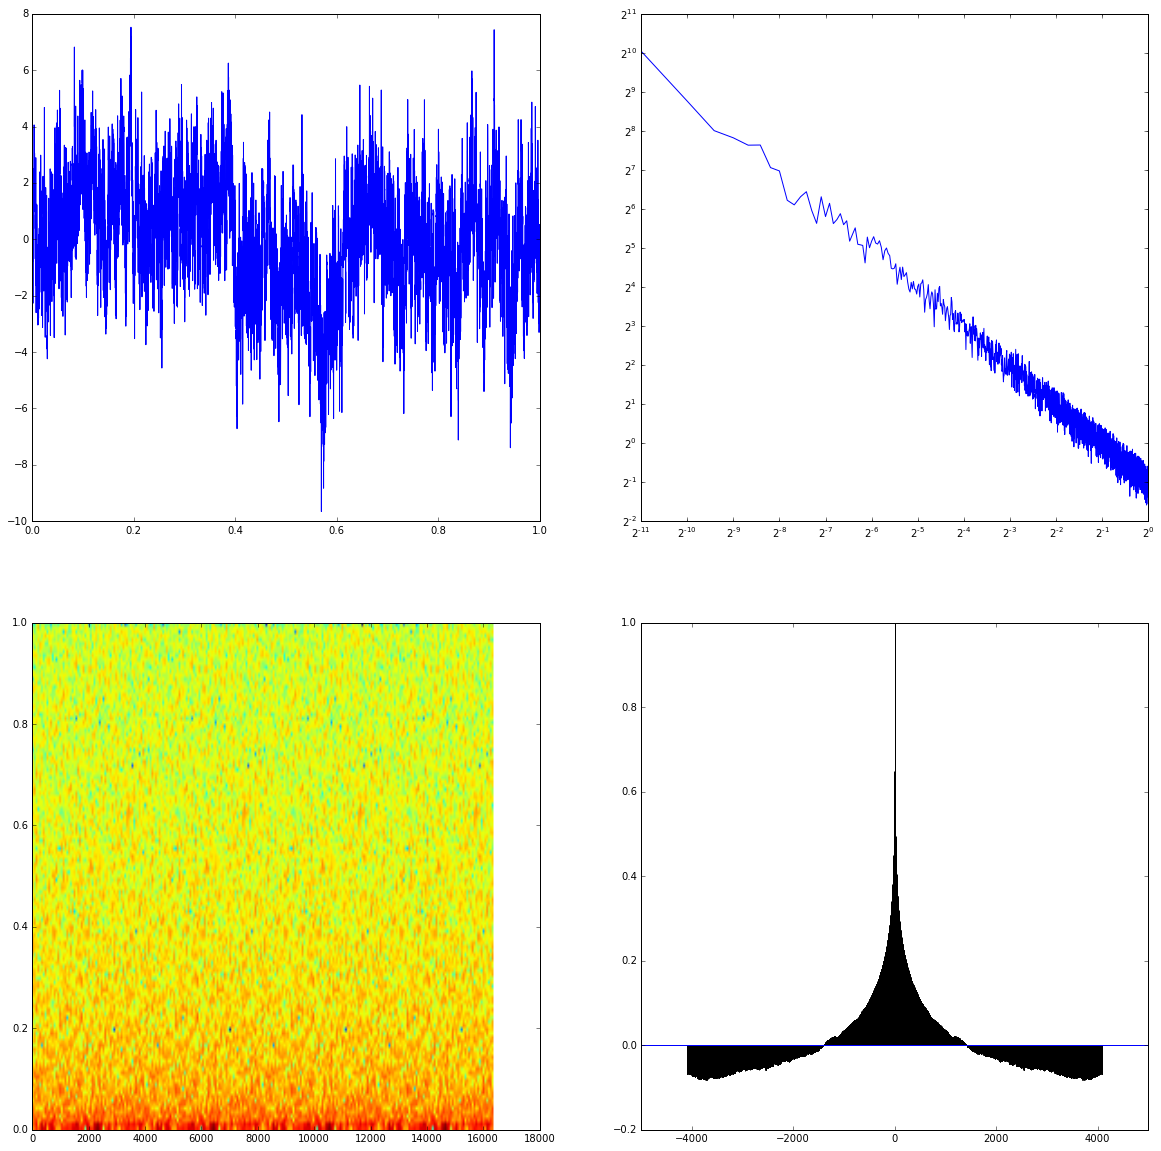

In [23]:
@iw.interact
def h(P=1.0):
    global Y, Z
    Y = amap(lambda x: f(x,A,I,P/2).sum(), X)
    Z=psd(Y,NFFT=N,noverlap=N/2)
    clf()
    figure(figsize=(20,20))
    subplot(221)
    plot(X[:2*N],Y[:2*N])
    subplot(222)
    loglog(Z[1], Z[0], basex=2, basey=2)
    subplot(223)
    specgram(Y)
    subplot(224)
    acorr(Y-Y.mean(),maxlags=N)

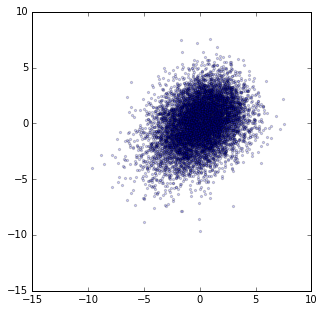

In [33]:
@iw.interact
def z(d=(0.0,0.01,0.0001)):
    figure(figsize=(5,5))
    D=int(2*d*N)
    scatter(Y[:2*N],Y[D:((2*N)+D)],alpha=0.2, marker='.')